# Choosing positions for Homebox Storage | Business Proposal | Introduction

## Introduction
The purpose of this project is to help businessman for choosing position for Box storage business taking in account their environment. We are going to achieve it by study how one major (HOMEBOX) is taking decision. It will help businessman making smart and efficient decision on selecting great place in France. Lots of people are searching new business position in the immovable industries specially on box storage in France. This is the complete study of how big industrial are taking decision in the sector. We show which parameters are relevant when it’s come to choose place for new box storage. This project is for those people who are looking for better way to decision before

## Launching new business
This Project aim to create an analysis of features for a young businessman to search a best place for business home box. The features include venues, professional and non professional business, area and demographic.
It will help people to get basics answers of the area and neighborhood before launching a new storage box business. Choosing a new city, state, place for new business or to start one.

## Problem Which Tried to Solve
The major purpose of this project, is to suggest a better business position in a France for businessman


## The Location
France is a popular destination for new business. As a result, it is one of the most diverse and multicultural areas in the word, being home to various religious groups and places of worship. Although business has become a hot topic over the past few years specially with Emmanuel Macron as president.

Foursquare API: This project would use Four-square API and scraping data from https://www.homebox.fr/ as its prime data gathering source. Four-square API is a database of millions of places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Work

## Flow
Using credentials of Foursquare API features of near-by places of the neighborhoods would be mined. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 50 and the radius parameter would be set to 1500. Clustering Approach: We decided to explore neighborhoods, segment them, and group them into clusters to find similar neighborhoods in a big city like New York and Toronto. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: k-means clustering algorithm Libraries Which are Used to Develope the Project:  
Pandas: For creating and manipulating dataframes.  
Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map. Scikit Learn: For importing k-means clustering.  
JSON: Library to handle JSON files.  
XML: To separate data from presentation and XML stores data in plain text format.  
Geocoder: To retrieve Location Data.  
Beautiful Soup and Requests: To scrap and library to handle http requests.  
Matplotlib: Python Plotting Module  


In [1]:
################# 
#Import necessary package for pandas library 
######################  
!pip3 install pandas
import pandas as pd
import numpy as np

################# 
#Import necessary package for scraping 
######################

!pip3 install BeautifulSoup4
from bs4 import BeautifulSoup
import requests
from requests import get 
import re

# import get from request to get all the pa
###############################################################
###### Import necessary  library to look on the different page######
#############################################################
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output # Since we’re going to make 72 requests,Our work will look a bit untidy 
                                              #. To avoid that, we’ll clear the output after each iteration
import warnings

###############################################################
###### Import necessary  library to get coordinate from an adress ######
#############################################################
!pip3 install geopy
from geopy.geocoders import Nominatim
# convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter 


#########################################################################
###### Import necessary library for ploting
##########################################################################
!pip3 install matplotlib
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
%matplotlib inline 

#########################################################################
###### Import geo Mapping
##########################################################################
!pip3 install folium
import folium


#########################################################################
####### Imoport necessary package for scraping table in Webpage
##########################################################################
!pip3 install lxml
import lxml.html as lh


In [29]:
#url_home_box='https://www.homebox.fr/garde-meuble-paris.html'# url from homebox
#result=requests.get(url_home_box) # Storr the url in the variable result
#result.text[:500] # Show the first 1000 charactère for the link

In [8]:
soup=BeautifulSoup(result.text, 'html.parser')
#print(soup.prettify()[:500])

In [9]:
#home_box_contains=soup.find_all('div',  class_='required-fields row')
home_box_contains=soup.find_all('div',  class_='coordinates')
home_box_contains1=soup.find_all('div', class_='middle col-sm-6 col-xs-12')
#home_box_contains1

## Scraping the HomeBox Webpage

In [21]:
#Declare all the variable
postals=[]
locatites=[]
adresses=[]
votes=[]
ratings=[]
codes =[]

# Preparing the monitoring of the loop
start_time = time()
requests = 0
years_url = [str(i) for i in range(2000,2001)] # Initialisation du paramètre years_url dans la boucle
stockage_homebox=["garde-meuble-paris","garde-meuble-lyon","garde-meuble-marseille","garde-meuble-toulouse","garde-meuble-bordeaux",
                "garde-meuble-nice","garde-meuble-lille","garde-meuble-nantes","garde-meuble-montpellier"]
# For every year in the interval 2000-2017
for year_url in years_url:
# Initialise the for loop for the different page
    for stockage in stockage_homebox:

# Make a get request
        result_home_box_scraping = get('https://www.homebox.fr/'+stockage+'.html')
# Pause the loop
        sleep(randint(8,15))

# Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

# Break the loop if the number of requests is greater than expected
        if requests > 10:
            warn('Number of requests was greater than expected.')
            break
                                       
        soup_home_box_scraping = BeautifulSoup(result_home_box_scraping.text, 'html.parser')
        home_box_contains2= soup_home_box_scraping.find_all('div',  class_='coordinates')
        home_box_contains3=soup_home_box_scraping.find_all('div',  class_='middle col-sm-6 col-xs-12')

 # For every movie of these 50
        for contain in home_box_contains2:
# Obtains the postal code of the ome box
            postal= contain.find('span', class_ = 'postal-code').text
            codes.append(postal)

# Obtain the locality of the product
            localite= contain.find('span', class_ = 'locality').text
            #locatites.append(localite)

# Obtain the complete adresse
            adresse=contain.find('div', class_='thoroughfare').text
            #adresses.append(adresse)
        
# Concatenante the parameter adresse + postalt + locatlite
            postals.append('Homebox ; '+''+adresse +' '+postal+' '+ localite)
    
# Obtain the datad form the privat profetionnel
        for contain1 in home_box_contains3:
            postal1= contain1.find('div', class_ = 'adress').text
            postals.append('Privat ;'+ postal1)

            df_home_box = pd.DataFrame({'Postalcode': postals})
            
            #print(test_df.info())
            df_home_box = df_home_box[['Postalcode']]
            df_home_Adress =pd.DataFrame({'code': codes})

Request:9; Frequency: 0.06402487772212706 requests/s


#### Put the scraping Datei in a gut sctructure

In [22]:
df = df_home_box 
df[['Homeboxyes&no','Postalcode']] = df.Postalcode.str.split(';', expand=True).iloc[:,[0,1]]

In [23]:
df[0:3]

,Postalcode,Homeboxyes&no
0,11 rue Piccini 75016 Paris,Homebox
1,8 place Boulnois 75017 Paris,Homebox
2,1 rue Jean Lolive 93170 Bagnolet,Homebox


#### Extract ZIP code from adress

In [24]:
df['Code Postal'] = df['Postalcode'].str.extract(r'(\d{5}\-?\d{0,4})')
df[0:3]

,Postalcode,Homeboxyes&no,Code Postal
0,11 rue Piccini 75016 Paris,Homebox,75016
1,8 place Boulnois 75017 Paris,Homebox,75017
2,1 rue Jean Lolive 93170 Bagnolet,Homebox,93170


#### Save the Data

In [25]:
df.to_csv('Scrapingdata.csv')

## Find the coordinate on the coll Postalcode

#### Call the Scrapingdata

In [155]:
df1 = pd.read_csv('Scrapingdata.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1

,Postalcode,Homeboxyes&no,Code Postal
0,11 rue Piccini 75016 Paris,Homebox,75016
1,8 place Boulnois 75017 Paris,Homebox,75017
2,1 rue Jean Lolive 93170 Bagnolet,Homebox,93170
3,12-14 avenue de la République 93170 Bagnolet,Homebox,93170
4,137-141 avenue Jean Jaurès 93300 Aubervilliers,Homebox,93300
...,...,...,...
244,Rue de la Condamine - 34080 Montpellier,Privat,34080
245,Rue Alberti - 34970 Lattes,Privat,34970
246,Chemin du Salinié - 34570 Pignan,Privat,34570
247,Rue Séguier - 30000 Nîmes,Privat,30000


### Find the Coordinate on the call Postalcode

In [157]:
# We create locator that holds the Geocoding service
locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
df1['location'] = df1['Postalcode'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df1['point'] = df1['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# 4 - split point column into latitude, longitude and altitude columns
df1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df1['point'].tolist(), index=df1.index)
df1[:2]

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Rue Choron - 75009 Paris',), **{}).
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/usr/lib/python3.7/http/client.py", line 1399, in connect
    super().connect()
  File "/usr/lib/python3.7/http/client.py", line 938, in connect
    (self.host,

,Postalcode,Homeboxyes&no,Code Postal,location,point,latitude,longitude,altitude
0,11 rue Piccini 75016 Paris,Homebox,75016,"(11, Rue Piccini, Quartier de Chaillot, Paris,...","(48.8742855, 2.284862, 0.0)",48.874285,2.284862,0.0
1,8 place Boulnois 75017 Paris,Homebox,75017,"(8, Place Boulnois, Quartier des Ternes, Paris...","(48.8792006, 2.2960456, 0.0)",48.879201,2.296046,0.0


In [158]:
df1.shape

(249, 8)

In [174]:
# Create de Dataframe d2 with: Postalcode, Homeboxyes&no, Code Postal, location, point, latitude, longitude
df2=df1[['Postalcode', 'Homeboxyes&no', 'Code Postal', 'latitude', 'longitude']]

# Drop NA values
df2=df2.dropna(axis=0, how='any')
df2

,Postalcode,Homeboxyes&no,Code Postal,latitude,longitude
0,11 rue Piccini 75016 Paris,Homebox,75016,48.874285,2.284862
1,8 place Boulnois 75017 Paris,Homebox,75017,48.879201,2.296046
2,1 rue Jean Lolive 93170 Bagnolet,Homebox,93170,48.865592,2.425566
3,12-14 avenue de la République 93170 Bagnolet,Homebox,93170,48.862514,2.415804
4,137-141 avenue Jean Jaurès 93300 Aubervilliers,Homebox,93300,48.906441,2.395049
...,...,...,...,...,...
243,Avenue du XV de France - 34070 Montpellier,Privat,34070,43.591086,3.845411
244,Rue de la Condamine - 34080 Montpellier,Privat,34080,43.612800,3.829812
245,Rue Alberti - 34970 Lattes,Privat,34970,43.571911,3.904329
246,Chemin du Salinié - 34570 Pignan,Privat,34570,43.592538,3.767092


In [175]:
df2.shape

(226, 5)

#### Save the latitude and longitude from the Homebox data in the CSV file

In [176]:
df2.to_csv('homeboxlatitudeandlongitude.csv')

## Localisation of storage

In [178]:
# Call the homeboxlatitudeandlongitude.csv
df2=[]
df2=pd.read_csv('homeboxlatitudeandlongitude.csv')
df2=df2.drop(['Unnamed: 0'], axis=1 )
df2[:2]

,Postalcode,Homeboxyes&no,Code Postal,latitude,longitude
0,11 rue Piccini 75016 Paris,Homebox,75016,48.874285,2.284862
1,8 place Boulnois 75017 Paris,Homebox,75017,48.879201,2.296046


In [179]:
df2.shape

(226, 5)

In [98]:
# Create a map centered at the given latitude and longitud
waterfront_map = folium.Map(location=[46.2276382, 2.2137489],
                        zoom_start=6,
                           tiles='openstreetmap')

# Plot the different coordonate values on the maps
for i in df2.index:
    lat=df2.latitude[i]
    long=df2.longitude[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)
waterfront_map 

#  venues

##  venues Scraping

In [ ]:
LIMIT = 10
radius = 500
CLIENT_ID = '3WGIGW2JP1DAQABSATJENRP25A3THDBEC303QEHM0KPKGKMT'     # your Foursquare ID
CLIENT_SECRET = 'RCOBC0XDX30OHNM402UL5AXMRGHCXZML042LJ2EEERQSRIFW' # your Foursquare Secret
VERSION = '20180605' # Version declaration 
latitudes =  df2['latitude']
longitudes = df2['longitude']
nearby_venues_Lim10etrad500=[]
venues_list = []
name = []

# Make a request from Foursquare to get the
for lat, lng in zip(latitudes,longitudes):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    url
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for v in results:
# return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'])]) 

        nearby_venues_Lim10etrad500 = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues_Lim10etrad500.columns = ['Neighborhood',
                                 'Neighborhood Latitude',
                                 'Neighborhood Longitude',
                                 'Venue', 
                                 'Venue Latitude',
                                 'Venue Longitude', 
                                 'Venue Category']

In [ ]:
#Store scraping data 
nearby_venues_Lim10etrad500.columns.to_csv('venuescraping.csv')

### Call the venue dataframe and format it 

In [127]:
# Call the Dataframe 
dfCorrespondanceInseeetPosta=pd.read_csv('venuescraping.csv')

#C get unique element dased on the Venue Longitude
dfCorrespondanceInseeetPosta = dfCorrespondanceInseeetPosta.drop_duplicates(subset='Venue Latitude', keep="first")

# Drop the Unnamed: 0 Coll from the dataframe
dfCorrespondanceInseeetPosta=dfCorrespondanceInseeetPosta.drop(['Unnamed: 0'], axis=1 )
dfCorrespondanceInseeetPosta[:2]

,HomeboxYesandNo,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Homebox,48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,Homebox,48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio


In [128]:
#Print shape of the Dataframe dfCorrespondanceInseeetPosta
dfCorrespondanceInseeetPosta.shape

(898, 7)

In [158]:
# Merge the data "dfCorrespondanceInseeetPosta" and df2 (homeboxlatitudeandlongitude) by the latitude ans 
dfmergeinsee = pd.merge(dfCorrespondanceInseeetPosta, df2, on=['longitude'], how='inner')

# Create a new dataframe
dfmergeinsee = dfmergeinsee[['Postalcode','Code Postal','Venue','Venue Category','Venue Latitude','Venue Longitude','HomeboxYesandNo']]
dfmergeinsee[:2]

,Postalcode,Code Postal,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,11 rue Piccini 75016 Paris,75016,Le Petit Pergolèse,French Restaurant,48.874472,2.282857,Homebox
1,11 rue Piccini 75016 Paris,75016,Ban Sabai,Massage Studio,48.874426,2.284837,Homebox


In [159]:
# Store the data merge from dfCorrespondanceInseeetPosta and df2 in the same Dataframe
dfmergeinsee.to_csv('dfmergeinseeFormater')

In [22]:
#Call the pandas dataframe
dfmergeinseeFormater=pd.read_csv('dfmergeinseeFormater')
dfmergeinseeFormater.shape

(774, 8)

In [23]:
dfmergeinseeFormater[:2]

,Unnamed: 0,Postalcode,CodePostal,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,0,11 rue Piccini 75016 Paris,75016,Le Petit Pergolèse,French Restaurant,48.874472,2.282857,Homebox
1,1,11 rue Piccini 75016 Paris,75016,Ban Sabai,Massage Studio,48.874426,2.284837,Homebox


## merge CodePostal from Foursquare venue and Code Postal_Insee.csv

In [106]:
# Call the dataframe ode Postal_Insee.csv
df_CorrespondanceInseeetPostal=pd.read_csv('Code_Postal_Insee.csv')
df_CorrespondanceInseeetPostal[:2]

,Unnamed: 0,CodePostal,Count_x,Unnamed: 0.1,Count_y,CodeInsee,Nom_commune,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps,Unnamed: 7
0,0,75017,13,0,13,75117,PARIS 17,NaN,PARIS,PARIS,48.887337,2.307486
1,1,75014,9,1,9,75114,PARIS 14,NaN,PARIS,PARIS,48.828993,2.327101


In [14]:
df_CorrespondanceInseeetPostal.shape

(136, 12)

In [11]:
df_CorrespondanceInseeetPostal=pd.read_csv('laposte_hexasmal.csv')
df_CorrespondanceInseeetPostal[:2]
df_CorrespondanceInseeetPostal.shape

(39192, 8)

In [182]:
df_CorrespondanceInseeetPostal.shape

(39192, 8)

In [31]:
#format the call Code_Insee in a Integer Value
df_CorrespondanceInseeetPostal['CodePostal']=df_CorrespondanceInseeetPostal.CodePostal.astype(int)

# merge dataframe with Codeinsee and scrapingvenues Datas
df_merge_Insee_Postal = pd.merge(df_CorrespondanceInseeetPostal, dfmergeinseeFormater, on=['CodePostal'], how='inner')

#Get unique value base on venue

df_merge_Insee_Postal[:2]

,Codeinsee,Commune,CodePostal,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps,Unnamed: 7,Unnamed: 0,Postalcode,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,6088,NICE,6200,NaN,NICE,NICE,43.711999,7.238269,704,Boulevard de Magnan - 06200 Nice,Promenade Magnan,Beach,43.690156,7.245333,Privat
1,6088,NICE,6200,NaN,NICE,NICE,43.711999,7.238269,705,Boulevard de Magnan - 06200 Nice,Magnan Plage,Beach,43.690991,7.244777,Privat


In [231]:
df_merge_Insee_Postal.shape

(911, 15)

In [18]:
# Format the cell 
df_merge_Insee_Postal= df_merge_Insee_Postal[['Postalcode','Commune','CodePostal', 'Codeinsee','Venue','Venue Category','Venue Latitude','Venue Longitude','HomeboxYesandNo']]

# Drop duplicate row based on column Venue
df_merge_Insee_Postal = df_merge_Insee_Postal.drop_duplicates(subset='Venue', keep="first")

# Store df_merge_Insee_Postal in a dataframe 
df_merge_Insee_Postal.to_csv('df_merge_Insee_Postal')

#Print two first value
df_merge_Insee_Postal[:2]

,Postalcode,Commune,CodePostal,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,Boulevard de Magnan - 06200 Nice,NICE,6200,6088,Promenade Magnan,Beach,43.690156,7.245333,Privat
1,Boulevard de Magnan - 06200 Nice,NICE,6200,6088,Magnan Plage,Beach,43.690991,7.244777,Privat


In [240]:
df_merge_Insee_Postal.shape

(638, 7)

# Plot histograme of venue

In [142]:
# call the Dataframe 
df_merge_Insee_Postal=pd.read_csv('df_merge_Insee_Postal')

# Drop the Unnamed: 0 Coll from the dataframe
df_merge_Insee_Postal=df_merge_Insee_Postal.drop(['Unnamed: 0'], axis=1 )

df_merge_Insee_Postal[:2]

,Postalcode,Commune,CodePostal,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,Boulevard de Magnan - 06200 Nice,NICE,6200,6088,Promenade Magnan,Beach,43.690156,7.245333,Privat
1,Boulevard de Magnan - 06200 Nice,NICE,6200,6088,Magnan Plage,Beach,43.690991,7.244777,Privat


In [21]:
df_merge_Insee_Postal.shape

(638, 9)

In [22]:
df_Privat=df_merge_Insee_Postal[df_merge_Insee_Postal.HomeboxYesandNo != 'Homebox ']
df_Privat[0:2]

,Postalcode,Commune,CodePostal,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,Boulevard de Magnan - 06200 Nice,NICE,6200,6088,Promenade Magnan,Beach,43.690156,7.245333,Privat
1,Boulevard de Magnan - 06200 Nice,NICE,6200,6088,Magnan Plage,Beach,43.690991,7.244777,Privat


In [88]:
df_Privat.shape

(536, 9)

In [14]:
df_Homebox=df_merge_Insee_Postal[df_merge_Insee_Postal.HomeboxYesandNo != 'Privat ']
df_Homebox[0:2]

,Postalcode,Commune,CodePostal,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
10,1 rue de L'Hermite 33520 Bruges,BRUGES,33520,33075,Gare SNCF de Bruges,Train Station,44.88657,-0.609200,Homebox
11,1 rue de L'Hermite 33520 Bruges,BRUGES,33520,33075,Marais de Bruges,Trail,44.88605,-0.600854,Homebox


In [38]:
df_Homebox.shape

(102, 9)

In [92]:
#create de coll Count
df_Privat['Count']=df_Privat.sum(axis=1)

# define new dataframe with HomeboxYes&No and Venue Categories
df_Privat = df_Privat.groupby(['HomeboxYesandNo','Venue Category']) ['Count'].count().reset_index()
 
# Descending order
df_Privat=df_Privat.sort_values(by = 'Count', ascending = False)

# Print the first two coll
df_Privat=df_Privat[0:10]

# Store the data in 
df_Privat.to_csv('df_Privat.csv')

#Print the data
df_Privat

/home/loth/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,HomeboxYesandNo,Venue Category,Count
61,Privat,French Restaurant,61
79,Privat,Hotel,37
7,Privat,Bakery,25
86,Privat,Japanese Restaurant,18
85,Privat,Italian Restaurant,17
122,Privat,Plaza,15
113,Privat,Park,12
8,Privat,Bar,12
142,Privat,Supermarket,11
25,Privat,Café,10


In [15]:
#create de coll Count
df_Homebox['Count']=df_Homebox.sum(axis=1)

# define new dataframe with HomeboxYes&No and Venue Categories
df_Homebox = df_Homebox.groupby(['HomeboxYesandNo','Venue Category']) ['Count'].count().reset_index()
 
# Descending order
df_Homebox=df_Homebox.sort_values(by = 'Count', ascending = False)

# Print the first two coll
df_Homebox[:10]

/home/loth/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,HomeboxYesandNo,Venue Category,Count
30,Homebox,Hotel,10
20,Homebox,French Restaurant,10
18,Homebox,Fast Food Restaurant,4
43,Homebox,Restaurant,3
31,Homebox,Italian Restaurant,3
8,Homebox,Cafeteria,3
39,Homebox,Pizza Place,3
46,Homebox,Seafood Restaurant,2
14,Homebox,Convenience Store,2
23,Homebox,Garden,2


In [59]:
#df_Homebox.to_csv('df_Homebox.csv')

/home/loth/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


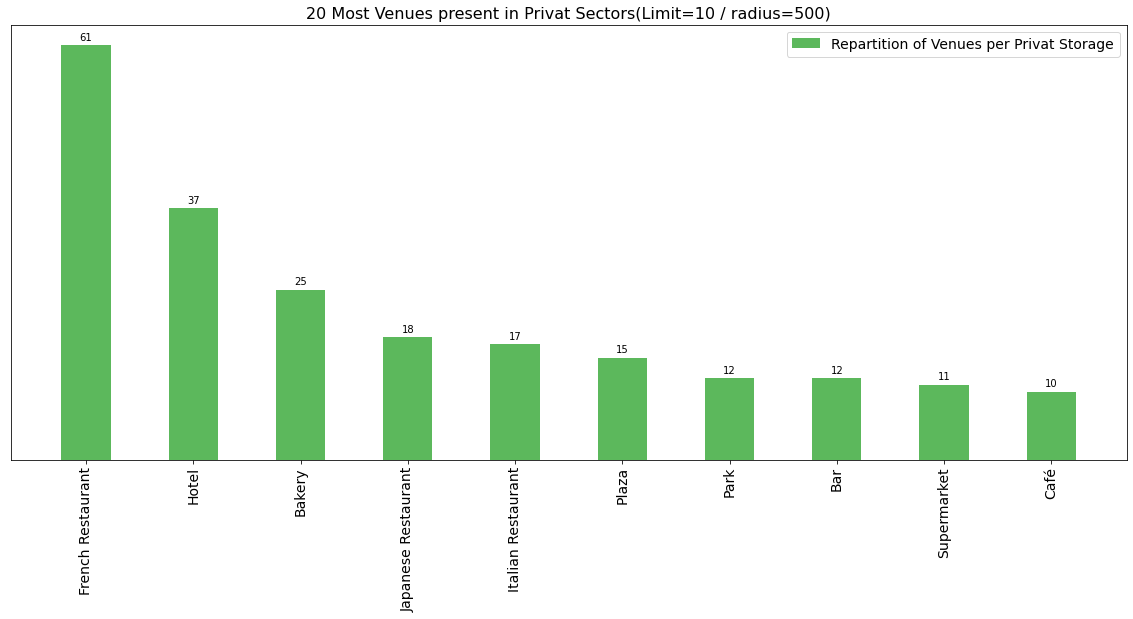

In [96]:
df_Privat=[]
df_Privat=pd.read_csv('df_Privat.csv')
# define a dataframe with only the 10 most venue in privat secto
     #df_Privat=df_Privat[:10]

# Define size for ploting 
plt.figure(figsize=(20,8))

# the width of the barsRepartition of Venues per Homebox Storage
barWidth = 0.46 

#define bar plots
bars1 = df_Privat['Count']

#bars2 = df_new_sort1['Count']

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='', label='Repartition of Venues per Privat Storage')

#rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_Privat['Venue Category'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
#autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('20 Most Venues present in Privat Sectors(Limit=10 / radius=500)', fontsize=16)
LIMIT = 50
radius = 500

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()

/home/loth/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


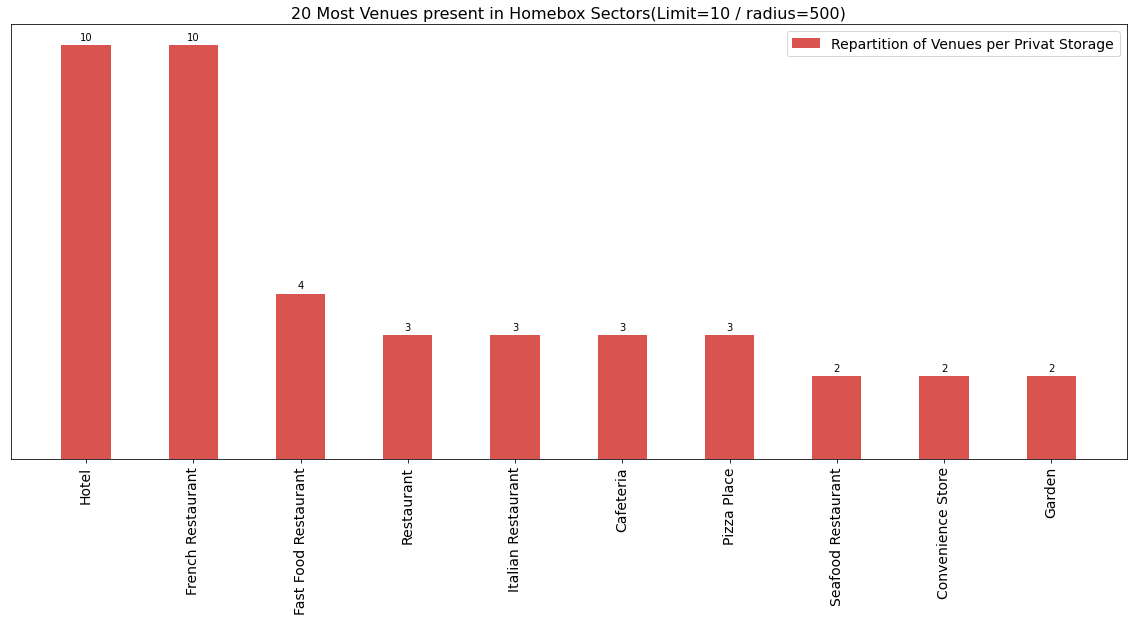

In [74]:

df_Homeboxt=[]

df_Homebox=pd.read_csv('df_Homebox.csv')
# define a dataframe with only the 10 most venue in privat secto
df_Homebox=df_Homebox[:10]

# Define size for ploting 
plt.figure(figsize=(20,8))

# the width of the barsRepartition of Venues per Homebox Storage
barWidth = 0.46 

#define bar plots
bars1 = df_Homebox['Count']

#bars2 = df_new_sort1['Count']

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='', label='Repartition of Venues per Privat Storage')

#rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_Homebox['Venue Category'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
#autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('20 Most Venues present in Homebox Sectors(Limit=10 / radius=500)', fontsize=16)
LIMIT = 50
radius = 1500

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()

In [52]:
df_merge_Insee_Postal

,Code Postal,Count_x,Unnamed: 0,Count_y,Code_commune_INSEE,Nom_commune,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps,Unnamed: 7
0,75017,13,0,13,75117,PARIS 17,NaN,PARIS,PARIS,48.887337,2.307486
1,75014,9,1,9,75114,PARIS 14,NaN,PARIS,PARIS,48.828993,2.327101
2,78370,8,2,8,78490,PLAISIR,NaN,PLAISIR,PLAISIR,48.812608,1.946985
3,75011,6,3,6,75111,PARIS 11,NaN,PARIS,PARIS,48.859415,2.378741
4,75019,6,4,6,75119,PARIS 19,NaN,PARIS,PARIS,48.886869,2.384694
...,...,...,...,...,...,...,...,...,...,...,...
266,59320,1,266,1,59566,SEQUEDIN,NaN,SEQUEDIN,SEQUEDIN,50.624819,2.982543
267,59320,1,267,1,59196,ENNETIERES EN WEPPES,NaN,ENNETIERES EN WEPPES,ENNETIERES EN WEPPES,50.640485,2.933122
268,59260,1,268,1,59350,LILLE,HELLEMMES LILLE,LILLE,LILLE,50.631718,3.047833
269,59260,1,269,1,59346,LEZENNES,NaN,LEZENNES,LEZENNES,50.611169,3.118242


In [144]:
# Call the necessary files
#df_Postal_Postal = pd.read_csv('df_merge_Insee_Postal.csv')

#format the call Code_Insee in a Integer Value
#df_Postal_Postal.CodeInsee.astype(int)

# Call the necessary files
df_Postal_Insee = pd.read_csv('CorrespondanceInseeetPostal.csv')

# create new dataframe with pure numeric entries 
df_Postal_Insee = df_Postal_Insee[~df_Postal_Insee['CodeInsee'].str.contains("[a-zA-Z]").fillna(False)]

#format the call Code_Insee in a Integer Value
df_Postal_Insee['CodeInsee']=df_Postal_Insee.CodeInsee.astype(int)

In [76]:
#df_Postal_Postal.dtypes

In [145]:
# Merge df_Postal_Insee and df_Postal_Postal bais on CodeInsee
df_merge=df_Postal_Insee.merge(df_merge_Insee_Postal, left_on='CodeInsee', right_on='Codeinsee')

# Store the result in synthesis
df_merge.to_csv('synthesis.csv')
df_merge[0:2]

,CodeInsee,CodePostal_x,Commune_x,Département,Région,Statut,Altitude Moyenne,Superficie,Population,Code Commune,...,Code Région,Postalcode,Commune_y,CodePostal_y,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,33119,33150,CENON,GIRONDE,AQUITAINE,Chef-lieu canton,46,571,22.2,36350,...,33,Impasse Queyries - 33150 Cenon,CENON,33150,33119,Gare SNCF de Cenon,Train Station,44.85640,-0.533513,Privat
1,33119,33150,CENON,GIRONDE,AQUITAINE,Chef-lieu canton,46,571,22.2,36350,...,33,Impasse Queyries - 33150 Cenon,CENON,33150,33119,Carrefour City,Supermarket,44.85581,-0.535170,Privat


In [32]:
df_merge.shape

(638, 23)

#### https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

#### Density Plot and Histogram of all superficie

In [27]:
df_merge = pd.read_csv('synthesis.csv')

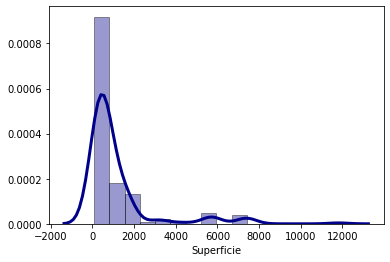

In [51]:
# Density Plot and Histogram of all superficie
sns.distplot(df_merge['Superficie'], hist=True, kde=True, 
             bins=int(16/1), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

#### Density Plot and Histogram of all superficie

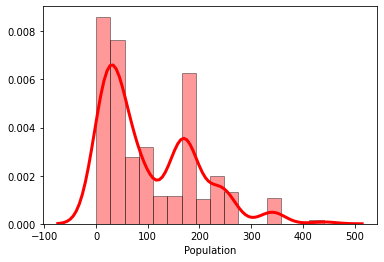

In [52]:
sns.distplot(df_merge['Population'], hist=True, kde=True, 
             bins=int(16/1), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

# Create dataframe with binary value

In [61]:
# Call the data
df_merge = pd.read_csv('synthesis.csv')

# create dataframe with two parameters Superficie & density
dfsupdens=df_merge[['CodeInsee','Superficie', 'Population', 'Venue Category','Venue Latitude','Venue Longitude']]
dfsupdens[0:3]

,CodeInsee,Superficie,Population,Venue Category,Venue Latitude,Venue Longitude
0,33119,571,22.2,Train Station,44.856400,-0.533513
1,33119,571,22.2,Supermarket,44.855810,-0.535170
2,33119,571,22.2,Tram Station,44.856002,-0.534191


In [68]:
dfsupdens.shape

(638, 6)

In [100]:
df_merge2 = pd.read_csv('synthesis.csv')

In [101]:
df_merge2.shape

(638, 24)

In [102]:
df_merge2[:1]

,Unnamed: 0,CodeInsee,CodePostal_x,Commune_x,Département,Région,Statut,Altitude Moyenne,Superficie,Population,...,Code Région,Postalcode,Commune_y,CodePostal_y,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,0,33119,33150,CENON,GIRONDE,AQUITAINE,Chef-lieu canton,46,571,22.2,...,33,Impasse Queyries - 33150 Cenon,CENON,33150,33119,Gare SNCF de Cenon,Train Station,44.8564,-0.533513,Privat


In [103]:
# Drop duplicate row based on column Venue
df_merge_Insee_Postal = df_merge_Insee_Postal.drop_duplicates(subset='Venue', keep="first")

In [161]:
df2.shape

(226, 5)

In [108]:
df2[:1]

,Postalcode,Homeboxyes&no,Code Postal,latitude,longitude
0,11 rue Piccini 75016 Paris,Homebox,75016,48.874285,2.284862


In [107]:
# Call the dataframe ode Postal_Insee.csv
df_CorrespondanceInseeetPostal[:2]

,Unnamed: 0,CodePostal,Count_x,Unnamed: 0.1,Count_y,CodeInsee,Nom_commune,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps,Unnamed: 7
0,0,75017,13,0,13,75117,PARIS 17,NaN,PARIS,PARIS,48.887337,2.307486
1,1,75014,9,1,9,75114,PARIS 14,NaN,PARIS,PARIS,48.828993,2.327101


In [163]:
df2.shape

(5392, 51)

In [ ]:
dfSalaire['pricesMatch?'] = np.where(dfSalaire['CodeInsee'] == df2['CodeInsee'], 'True', 'False')  #create new column in df1 to check if prices match
print (df1)

# Start to farmat the Dataframe

In [69]:
df_merge[:2]

,Unnamed: 0,CodeInsee,CodePostal_x,Commune_x,Département,Région,Statut,Altitude Moyenne,Superficie,Population,...,Code Région,Postalcode,Commune_y,CodePostal_y,Codeinsee,Venue,Venue Category,Venue Latitude,Venue Longitude,HomeboxYesandNo
0,0,33119,33150,CENON,GIRONDE,AQUITAINE,Chef-lieu canton,46,571,22.2,...,33,Impasse Queyries - 33150 Cenon,CENON,33150,33119,Gare SNCF de Cenon,Train Station,44.85640,-0.533513,Privat
1,1,33119,33150,CENON,GIRONDE,AQUITAINE,Chef-lieu canton,46,571,22.2,...,33,Impasse Queyries - 33150 Cenon,CENON,33150,33119,Carrefour City,Supermarket,44.85581,-0.535170,Privat


In [26]:
# Select Rows based on any of the multiple values in column
subsetdfmerge=[]
subsetdfmerge= df_merge[df_merge['Venue Category'].isin(['French Restaurant', 'Hotel', 'Fast Food Restaurant', 'Restaurant', 'Italian Restaurant', 'Cafeteria', 'Pizza Place', 'Seafood Restaurant', 'onvenience Store','Garden' ])]

# Create a new Dataframe
subsetdfmerge = subsetdfmerge[['Postalcode','CodeInsee','Venue','Venue Category','Superficie','Population','HomeboxYesandNo','Venue Latitude','Venue Longitude']]

#Store the data in Dataframe
subsetdfmerge.to_csv('subsetdfmerge')
subsetdfmerge[:2]

,Postalcode,CodeInsee,Venue,Venue Category,Superficie,Population,HomeboxYesandNo,Venue Latitude,Venue Longitude
18,Rue Alberti - 34970 Lattes,34129,Melrose,Restaurant,3230,15.8,Privat,43.573256,3.899740
22,48 rue de Seine 92700 Colombes,92025,Le K.re,Restaurant,778,84.6,Homebox,48.923294,2.222994


In [71]:
subsetdfmerge.shape

(182, 7)

# Selection necesseray parameters

In [67]:
# Create a new dataframe with binary value for Superficie
subsetdfmerge['newsuperficie'] = np.where(subsetdfmerge['Superficie']<=750, '1', '0')

#Create a new dataframe with binary for value population
subsetdfmerge['newspopulation'] = np.where(subsetdfmerge['Population']<=50, '1', '0')

In [54]:
subsetdfmerge.shape

(182, 11)

In [74]:
# Create a function, wich transform string into dummy
def score_to_numeric(x):
    if x=='Hotel':
        return 1
    if x=='French Restaurant':
        return 1
    if x=='Fast Food Restaurant':
        return 1
    if x=='Hotel':
        return 1
    if x=='Bakery':
        return 1
    if x=='Restaurant':
        return 0
    if x=='Pizza Place':
        return 0
    if x=='Seafood Restaurant':
        return 0
    if x=='Convenience Store':
        return 0
    if x=='Garden':
        return 0

In [76]:
subsetbinair =[]
subsetdfmerge['scorevenue'] = subsetdfmerge['Venue Category'].apply(score_to_numeric)

# Create a new Dataframe with only binair value
subsetbinair=subsetdfmerge[['Postalcode','CodeInsee','Venue Category','newsuperficie','newspopulation','scorevenue','Venue Latitude','Venue Longitude']]

# Store the new dataframe
subsetbinair.to_csv('subsetbinair')
subsetbinair[:2]

,Postalcode,CodeInsee,Venue Category,newsuperficie,newspopulation,scorevenue,Venue Latitude,Venue Longitude
18,Rue Alberti - 34970 Lattes,34129,Restaurant,0,1,0.0,43.573256,3.899740
22,48 rue de Seine 92700 Colombes,92025,Restaurant,0,0,0.0,48.923294,2.222994


In [8]:
subsetbinair=pd.read_csv('subsetbinair')

In [88]:
# Create function for decision
def score_to_numeric(x):
    if x== '1':
        return 0
    if x=='2':
        return 1
    if x=='3':
        return 1

In [46]:
# Store the dataframe in the new name
dfsupdens.to_csv('dfsupdens')

In [47]:
#Call de dataframe dfsupends
dfsupends =pd.read_csv('dfsupdens')

#Drop the Coll Unnamed: 0, Superficie, Population
dfsupends=dfsupends.drop(['Unnamed: 0', 'Superficie','Population'], axis=1 )

dfsupends[:2]

,CodeInsee,newsuperficie,newspopulation
0,33119,1,1
1,33119,1,1
